   # Titre du projet   :   Cancer du sein
 
   # Nom et prénom :   Akoumi houda 

   # Ml algorithme   :    Support Vector Machines 

## Importation des données. 

In [1]:
# Importtion des bibliothèques 
import numpy as np        
import pandas as pd     

In [2]:
# Importation de  la base de donnée
data = pd.read_csv('C:/Users/hp/Desktop/Breast-cancer-risk-prediction-master/data/data.csv', index_col=False,)

In [3]:
# Ouvrir la base de donnée
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


###  Notre base de donnée contient  569 lignes et 32 colonnes.

In [4]:
# vérification si on a des variables manquantes 
data.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [5]:
# vérification de type des données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### On remarque que notre base de données contient la variable  'diagnosis ' de type catégorielle. 

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns # visualization


In [7]:
# Regrouper le diagnostique : B signifie Bénin et M signifie Malin
diag_gr = data.groupby('diagnosis', axis=0)
pd.DataFrame(diag_gr.size(), columns=["Nombre d'observations"])

,Nombre d'observations
diagnosis,
B,357
M,212


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

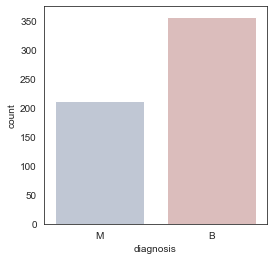

In [8]:
sns.set_style("white")
sns.set_context({"figure.figsize": (4, 4)})
sns.countplot(data['diagnosis'],label='effectifs',palette="vlag")

### On remarque qu'on a  357 cellules non cancéreuses  et 212 cellules  cancéreuses.

##  Prétraitement des données

In [9]:
data.drop('id', axis =1, inplace=True)
array = data.values
X = array[:,1:31]
y = array[:,0]

In [10]:
y

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

#Call the transform method of LabelEncorder on two dummy variables
#le.transform (['M', 'B'])

In [12]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

### Les tumeurs malignes sont maintenant représentées en classe 1 c'est-à-dire la présence des cellules cancéreuses.
### Les tumeurs bénignes sont représentées en classe 0 c'est-à-dire aucune détection de cellules. 

In [13]:
# Division des données en ensembles d’entraînement et de test.
from sklearn.model_selection import train_test_split

# Division d'ensemble de données dans le train 80 % et tester 20 %
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

### Les données brutes ont des distributions différentes qui peuvent avoir un impact sur la plupart des algorithmes de ML. La plupart des algorithmes d’apprentissage automatique et d’optimisation se comportent beaucoup mieux si les fonctionnalités sont à la même échelle.

In [14]:
# Normalisation des données (centrer autour de 0 et mettre à l'échelle pour supprimer la variance).
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
Xs = scaler.fit_transform(X)

### Je vais utiliser PCA pour  réduire  de la dimensionnalité afin  d’utiliser autant de caractéristiques que possible et de maintian autant d’informations que possible.

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9)

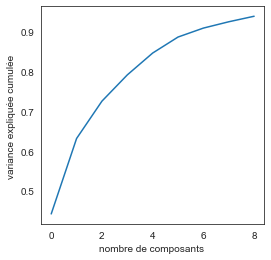

In [16]:
from sklearn.metrics import roc_curve, auc
pca = pca.fit(Xs)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('nombre de composants ')
plt.ylabel('variance expliquée cumulée ')
sns.set_context({"figure.figsize": (4, 4)})



### Le nombre de composants qui capturent environ 95% de la variance est d’environ 10.

In [17]:
pca = PCA(n_components=10)
fit = pca.fit(Xs)

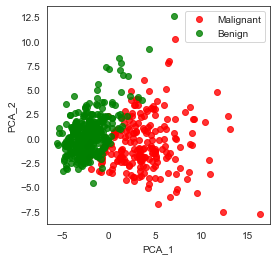

In [18]:
X_pca = pca.transform(Xs)

PCA_df = pd.DataFrame()

PCA_df['PCA_1'] = X_pca[:,0]
PCA_df['PCA_2'] = X_pca[:,1]
fig = plt.figure(figsize=(4,4))

plt.plot(PCA_df['PCA_1'][data.diagnosis == 'M'],PCA_df['PCA_2'][data.diagnosis == 'M'],'o', alpha = 0.8, color = 'r')
plt.plot(PCA_df['PCA_1'][data.diagnosis == 'B'],PCA_df['PCA_2'][data.diagnosis == 'B'],'o', alpha = 0.8, color = 'g')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant','Benign'])
plt.show()


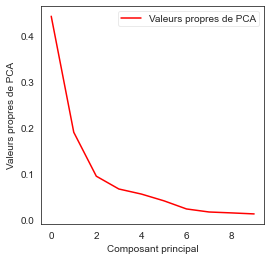

In [19]:

# Le montant de la variance que chaque PC explique 
var= pca.explained_variance_ratio_
fig = plt.figure(figsize=(4,4))
plt.plot(var,'r')
plt.xlabel('Composant principal')
plt.ylabel('Valeurs propres de PCA')

leg = plt.legend(['Valeurs propres de PCA'], loc='best', borderpad=0.3,shadow=False,markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.set_draggable(state=True)
plt.show()

### Le changement de pente le plus évident dans le diagramme d’éboulis se produit à la composante 2, qui est le « coude » du diagramme d’éboulis. Par conséquent, il convient de soutenir, sur la base du tracé des éboulis, que les trois premières composantes devraient être conservées.

## Support Vector Machine (SVM).

In [20]:
## Importation des bibliothèques.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report

In [21]:
#Création  d'un classificateur SVM et entraînez-le sur 80% de l'ensemble de données. 
clf = SVC(probability=True)
clf.fit(X_train, y_train)

# Analysez la précision des prédictions sur 20 % de l'échantillon de test de résistance. 
classifier_score = clf.score(X_test, y_test)
print ('\nLe score de précision du classificateur est :\t{:02.2f}\n'.format(classifier_score))


Le score de précision du classificateur est :	0.90



In [22]:
# La matrice de confusion permet de visualiser les performances de l'algorithme. 
y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[74  0]
 [11 29]]


### ROC : Une courbe caractéristique de fonctionnement du récepteur,ou courbe ROC,est un graphique qui illustre la capacité de diagnostic d’un système de classificateur binaire car son seuil de discrimination est varié.

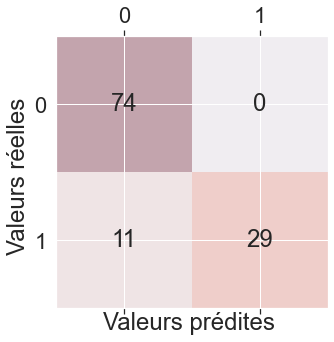

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        74
           1       1.00      0.72      0.84        40

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.89       114
weighted avg       0.92      0.90      0.90       114



<AxesSubplot:>

In [23]:
from IPython.display import Image, display
sns.set(font_scale=2)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Valeurs prédites ', )
plt.ylabel('Valeurs réelles ')
plt.show()
print(classification_report(y_test, y_pred ))
sns.heatmap(cm, annot=True, ax=ax)

### Il existe deux classes prédites possibles : « 1 » et « 0 ». Maligne  = 1 (indique la prescence des cellules cancéreuses) et bénigne = 0 (indique l’absence).
### Le classificateur a fait un total de 114  prédictions (c’est-à-dire que 114 patientes étaient testées pour la présence d’un cancer du sein).
### Sur ces 114 cas, le classificateur a prédit « oui » 29  fois et « non » 85 fois.
### En réalité, 40 patients de l’échantillon ont la maladie et 74 patients non.

Text(0, 0.5, 'Taux de vrais positifs ')

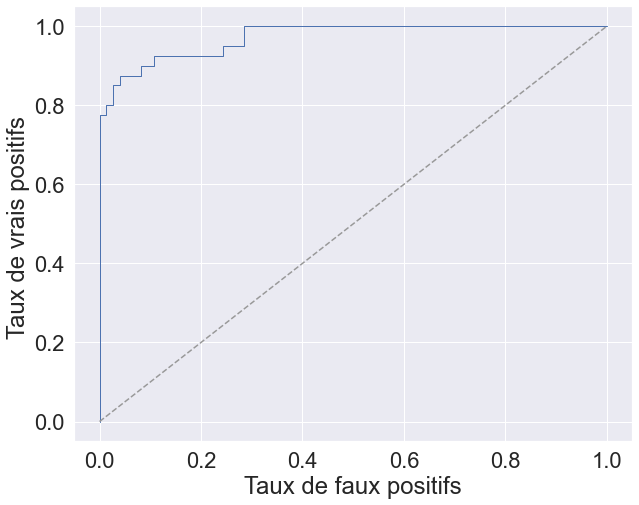

In [24]:
from sklearn.metrics import roc_curve, auc
# Plot the receiver operating characteristic curve (ROC).
plt.figure(figsize=(10,8))
probas_ = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs ')

## Optimisation du classificateur SVM

### Maintenant  je vise à régler les paramètres du modèle de classification SVM à l’aide de scikit-learn.
### Nous pouvons régler deux paramètres clés de l’algorithme SVM : la valeur de C (combien assouplir la marge) et  le type de noyau.

In [25]:
#Importation des bibliothèques 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_regression

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



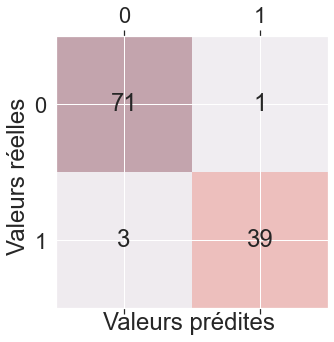

In [26]:
pca = PCA(n_components=10)
fit = pca.fit(Xs)
X_pca = pca.transform(Xs)

#  Division  des enregistrements en ensembles d'entraînement et de test.  .
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=7, stratify=y)

clf2 = make_pipeline(SelectKBest(f_regression, k=3),SVC(probability=True))
scores = cross_val_score(clf2, X_pca, y, cv=2)

# Obtenez une moyenne de 5 fois le score de validation croisée à l'aide d'un estimateur SVC. 
n_folds = 5
cv_error = np.average(cross_val_score(SVC(), X_pca, y, cv=n_folds))
#print ('\nLe score de précision de validation croisée de ce classificateur est  {:.2f}\n'.format(n_folds, cv_error))

y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred ))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Valeurs prédites ', )
plt.ylabel('Valeurs réelles ')
plt.show()



In [27]:
# Formation  des classificateurs.
from sklearn.model_selection import GridSearchCV
kernel_values = [ 'linear' ,  'poly' ,  'rbf' ,  'sigmoid' ]
param_grid = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6),'kernel': kernel_values}

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [28]:
print("Les meilleurs paramètres sont %s avec un score de %0.2f"
      % (grid.best_params_, grid.best_score_))

Les meilleurs paramètres sont {'C': 10.0, 'gamma': 0.001, 'kernel': 'linear'} avec un score de 0.98


In [29]:
grid.best_estimator_.probability = True
clf = grid.best_estimator_

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



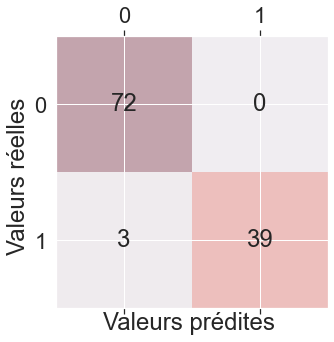

In [30]:
y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
#print(cm)
print(classification_report(y_test, y_pred ))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Valeurs prédites ', )
plt.ylabel('Valeurs réelles ')
plt.show()


### Voyons les limites de décision produites par les classificateurs linéaires, gaussiens et polynomiaux.

In [31]:
from matplotlib.colors import ListedColormap
from sklearn import svm, datasets

def decision_plot(X_train, y_train, n_neighbors, weights):
       h = .02  # step size in the mesh

Xtrain = X_train[:, :2] # we only take the first two features.

#================================================================
# Création  des cartes de couleurs 
#================================================================
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


#================================================================
# créotion  d'une instance de SVM et aménageons les données.
#  je met pas à l'échelle nos données car je voulais tracer les vecteurs de support 
#================================================================

C = 1.0  # Paramètre de régularisation SVM 

svm = SVC(kernel='linear', random_state=0, gamma=0.1, C=C).fit(Xtrain, y_train)
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=C).fit(Xtrain, y_train)
poly_svc = SVC(kernel='poly', degree=3, C=C).fit(Xtrain, y_train)

In [32]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9) 
plt.rcParams['axes.titlesize'] = 'large'
    
    # création d'un maillage dans lequel tracer 
x_min, x_max = Xtrain[:, 0].min() - 1, Xtrain[:, 0].max() + 1
y_min, y_max = Xtrain[:, 1].min() - 1, Xtrain[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))




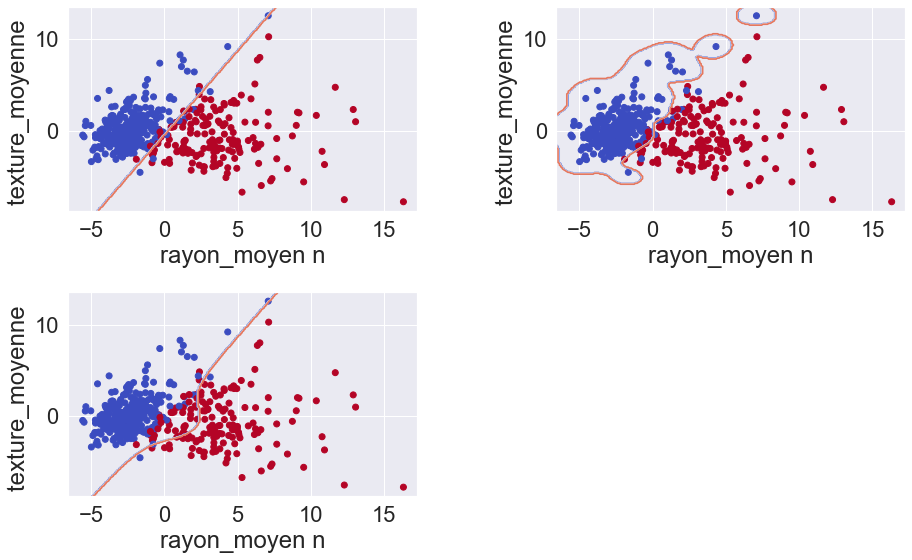

In [35]:
for i, clf in enumerate((svm, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=y_train, cmap=plt.cm.coolwarm)
    plt.xlabel('rayon_moyen n')
    plt.ylabel('texture_moyenne ')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())